In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Raw data analysis and visualisation

In [175]:
# Read csv file
df = pd.read_csv('dataset/customer.csv')
df.head(2)

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T


In [177]:
# Drop Unnamed: 0 column, reason - wrong indexing 
df.drop('Unnamed: 0',axis=1, inplace= True)
df.head(5)

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [8]:
# Dataset basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          72458 non-null  object 
 1   sex             72458 non-null  object 
 2   is_employed     46943 non-null  object 
 3   income          72458 non-null  float64
 4   marital_status  72458 non-null  object 
 5   health_ins      72458 non-null  bool   
 6   housing_type    70772 non-null  object 
 7   num_vehicles    70772 non-null  float64
 8   age             72458 non-null  int64  
 9   state_of_res    72458 non-null  object 
 10  code_column     72458 non-null  int64  
 11  gas_usage       70772 non-null  float64
 12  rooms           72458 non-null  int64  
 13  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 7.3+ MB


In [99]:
# Dataset shape
print(f'Dataframe shape: {df.shape}')
print(f'Dataframe size: {df.size}')

Dataframe shape: (72458, 14)
Dataframe size: 1014412


In [101]:
# Atributes types
print(f'Features types:\n{df.dtypes}')

Features types:
custid             object
sex                object
is_employed        object
income            float64
marital_status     object
health_ins           bool
housing_type       object
num_vehicles      float64
age                 int64
state_of_res       object
code_column         int64
gas_usage         float64
rooms               int64
recent_move_b      object
dtype: object


In [102]:
# Statistical characteristics of numerical atributes
df.describe()

,income,num_vehicles,age,code_column,gas_usage,rooms
count,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


In [105]:
# Statistical characteristics of categorical atributes
df.describe(include=[object])

,custid,sex,is_employed,marital_status,housing_type,state_of_res,recent_move_b
count,72458,72458,46943,72458,70772,72458,70771
unique,72458,2,2,4,4,51,2
top,001520877_01,Female,True,Married,Homeowner with mortgage/loan,California,F
freq,1,37461,44630,38040,31092,8870,61773


In [106]:
# Missing values check
print(f'Number of missing values:\n{df.isnull().sum()}')

Number of missing values:
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64


In [109]:
# Precentage of missing values
print(f'Missing values (precentage):\n{df.isnull().mean() * 100}')

Missing values (precentage):
custid             0.000000
sex                0.000000
is_employed       35.213503
income             0.000000
marital_status     0.000000
health_ins         0.000000
housing_type       2.326865
num_vehicles       2.326865
age                0.000000
state_of_res       0.000000
code_column        0.000000
gas_usage          2.326865
rooms              0.000000
recent_move_b      2.328245
dtype: float64


In [111]:
# Duplicates check
df[df.duplicated()]

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b


In [113]:
df.marital_status.value_counts()

marital_status
Married               38040
Never married         19120
Divorced/Separated    10572
Widowed                4726
Name: count, dtype: int64

In [70]:
# Unique values counts
for col in df.columns.to_list():
    print(f'{df[col].value_counts()}')

custid
001520877_01    1
000006646_03    1
000007827_01    1
000008359_04    1
000008529_01    1
               ..
000028817_02    1
000030000_02    1
000030038_02    1
000030948_02    1
000033559_02    1
Name: count, Length: 72458, dtype: int64
sex
Female    37461
Male      34997
Name: count, dtype: int64
is_employed
True     44630
False     2313
Name: count, dtype: int64
income
0.0         6691
30000.0     1650
20000.0     1394
40000.0     1390
50000.0     1357
            ... 
50580.0        1
225200.0       1
44880.0        1
83040.0        1
434890.0       1
Name: count, Length: 4445, dtype: int64
marital_status
Married               38040
Never married         19120
Divorced/Separated    10572
Widowed                4726
Name: count, dtype: int64
health_ins
True     65553
False     6905
Name: count, dtype: int64
housing_type
Homeowner with mortgage/loan    31092
Rented                          21956
Homeowner free and clear        16604
Occupied with no rent            1120
Name:

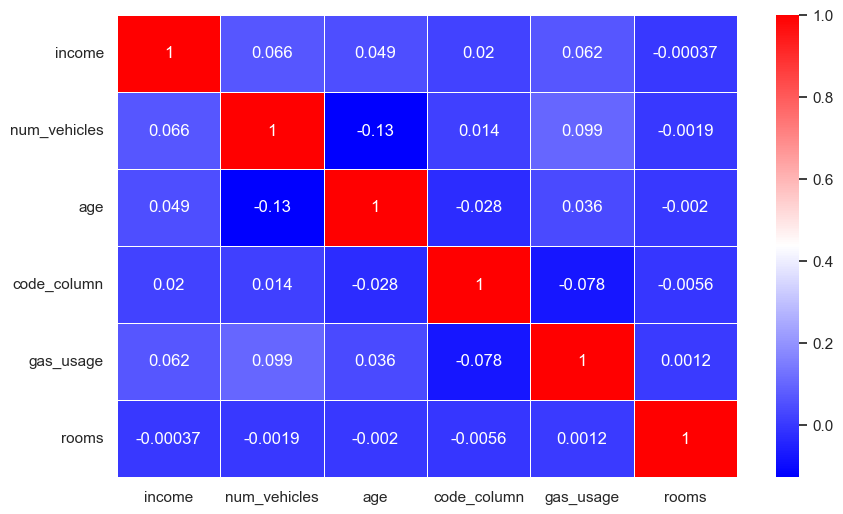

In [72]:
# Features correlations
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='bwr', linewidths=0.5)
plt.show()

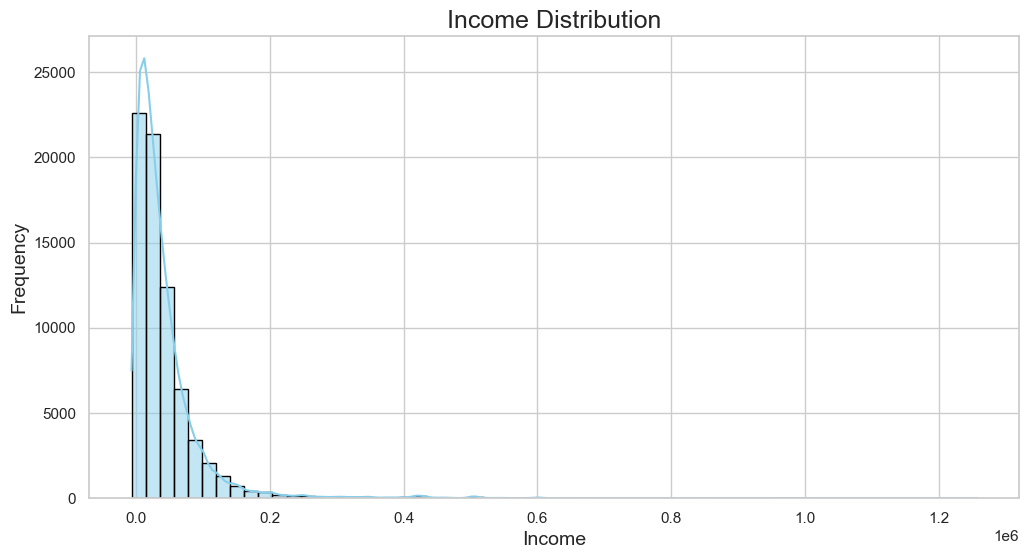

In [30]:
# Income histogram plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Set the figure size
sns.histplot(df['income'], bins=60, kde=True, color='skyblue', edgecolor='black')
plt.title('Income Distribution', fontsize=18)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

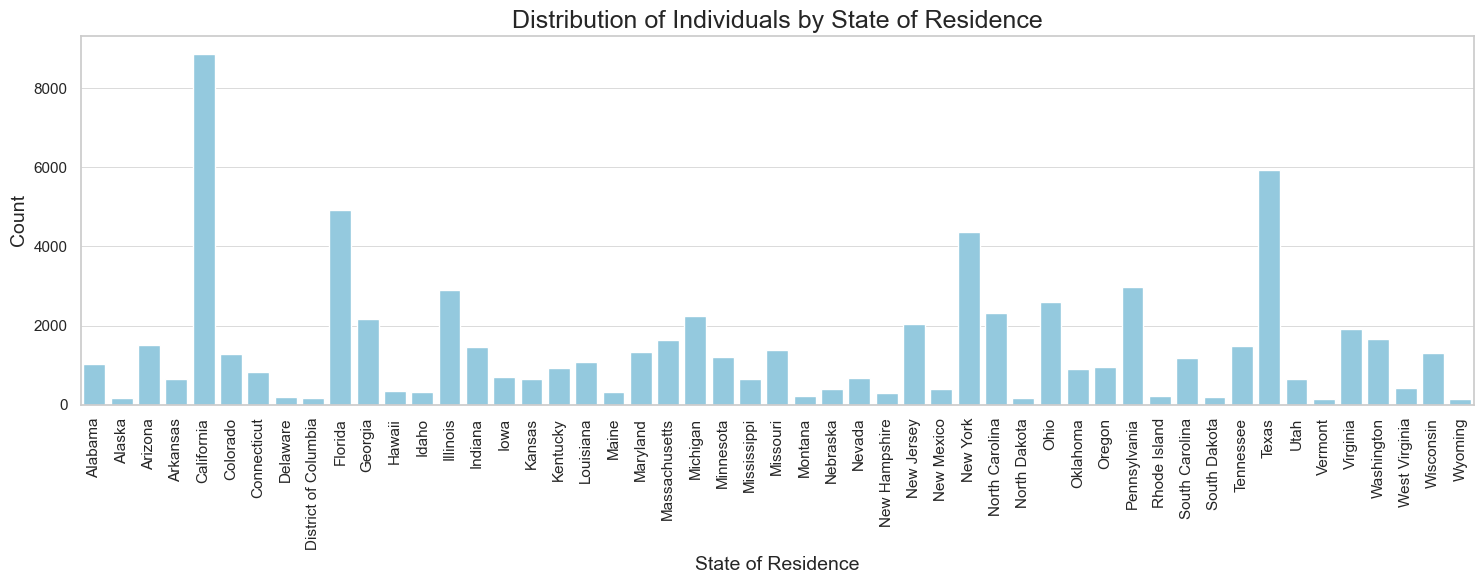

In [31]:
# Distribution of states
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='state_of_res', color='skyblue')
plt.title('Distribution of Individuals by State of Residence', fontsize=18)
plt.xlabel('State of Residence', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.grid(linestyle='-', linewidth=0.5, axis = 'y')
plt.tight_layout()
plt.show()

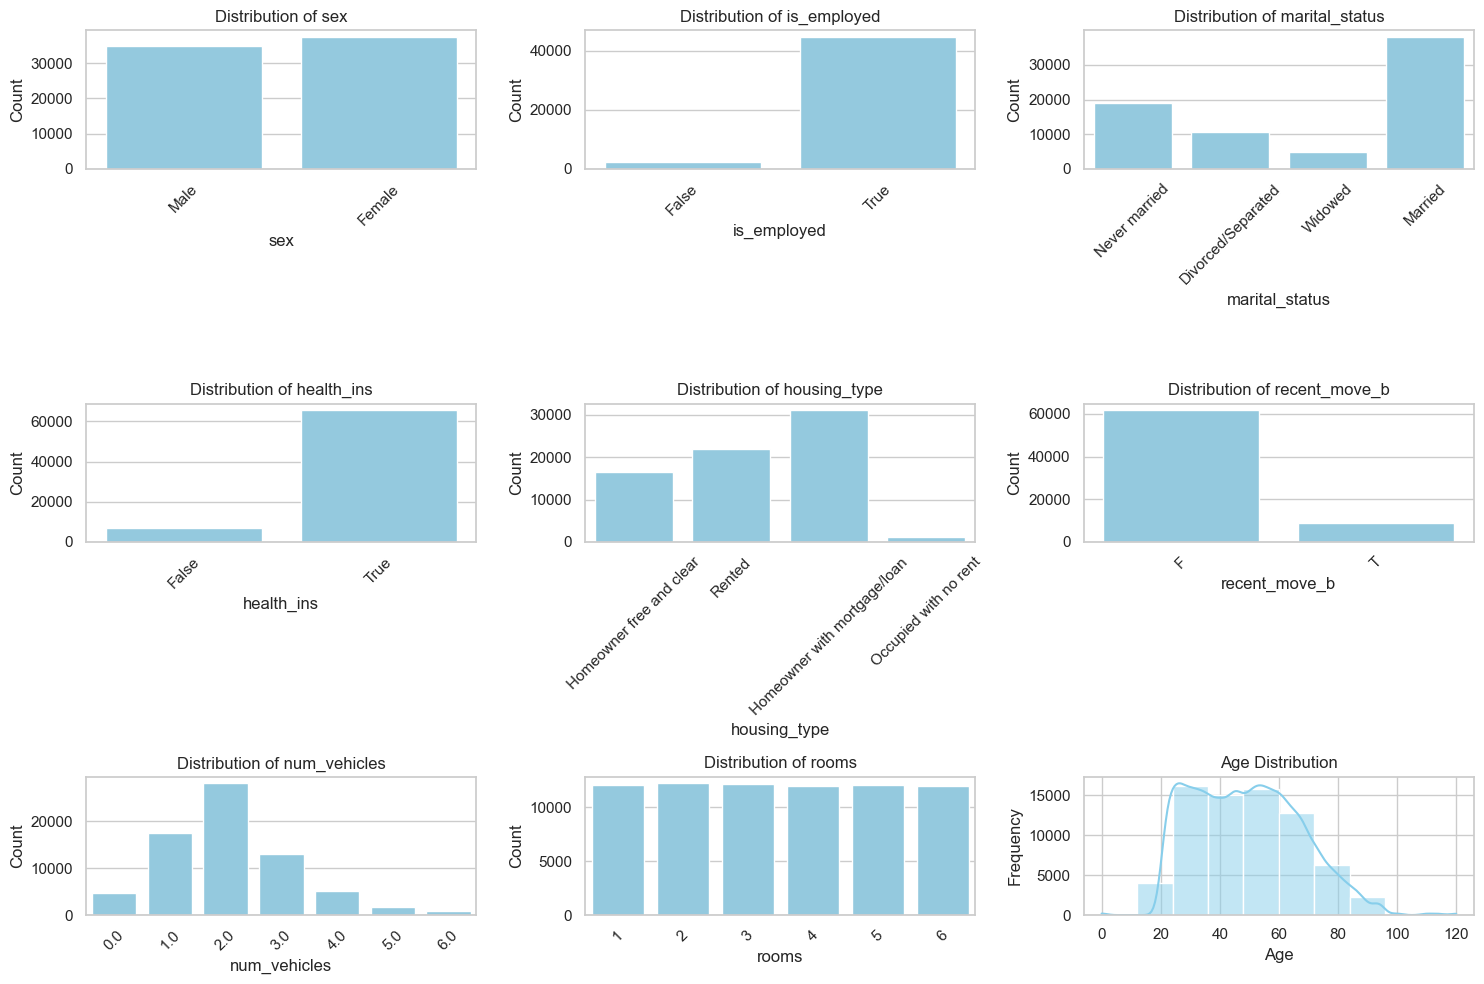

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10)) 
axes = axes.flatten()  

categorical_columns = [
    'sex', 'is_employed', 'marital_status',
    'health_ins', 'housing_type', 'recent_move_b',
    'num_vehicles', 'rooms'
]

# Plot bar charts for categorical variables
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)


sns.histplot(df['age'], bins=10, color='skyblue', kde = True)
axes[len(categorical_columns)].set_title('Age Distribution')
axes[len(categorical_columns)].set_xlabel('Age')
axes[len(categorical_columns)].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

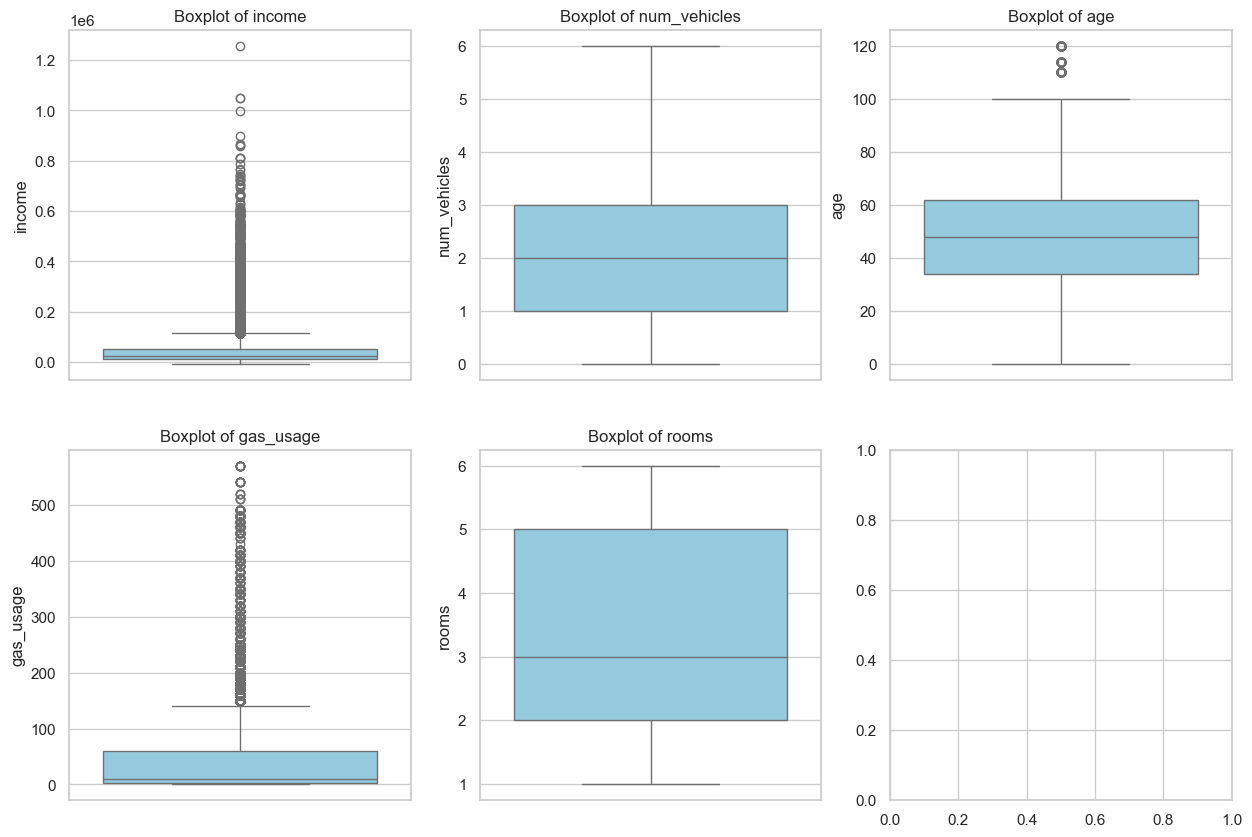

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
numerical_columns = [
    'income', 'num_vehicles', 'age', 'gas_usage', 'rooms'
]
# Plot bar charts for categorical variables
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('')

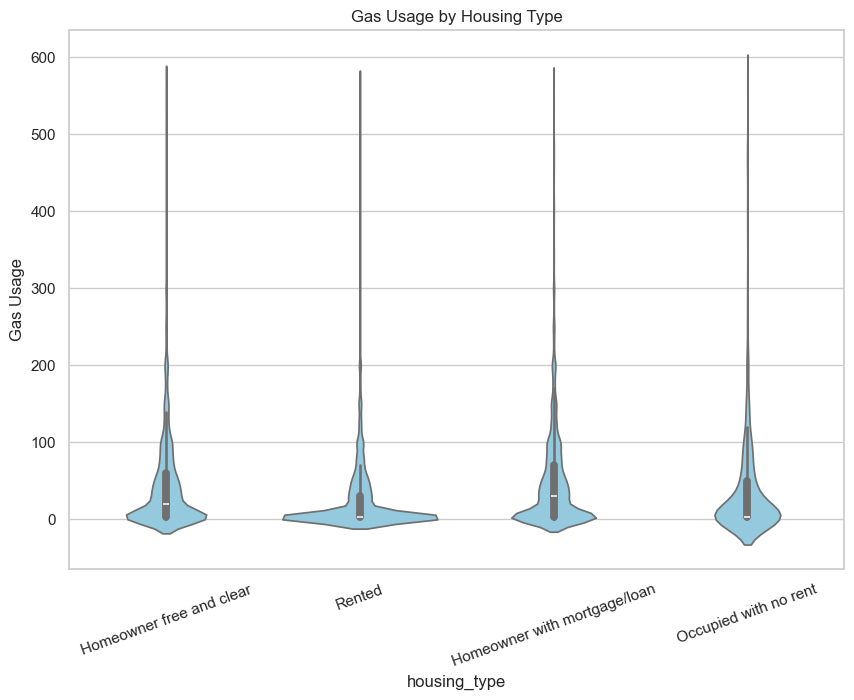

In [35]:
# Gas usage by housing type
plt.figure(figsize=(10, 7))
sns.violinplot(x='housing_type', y='gas_usage', data=df, color='skyblue')
plt.title('Gas Usage by Housing Type')
plt.ylabel('Gas Usage')
plt.xticks(rotation=20)
plt.show()

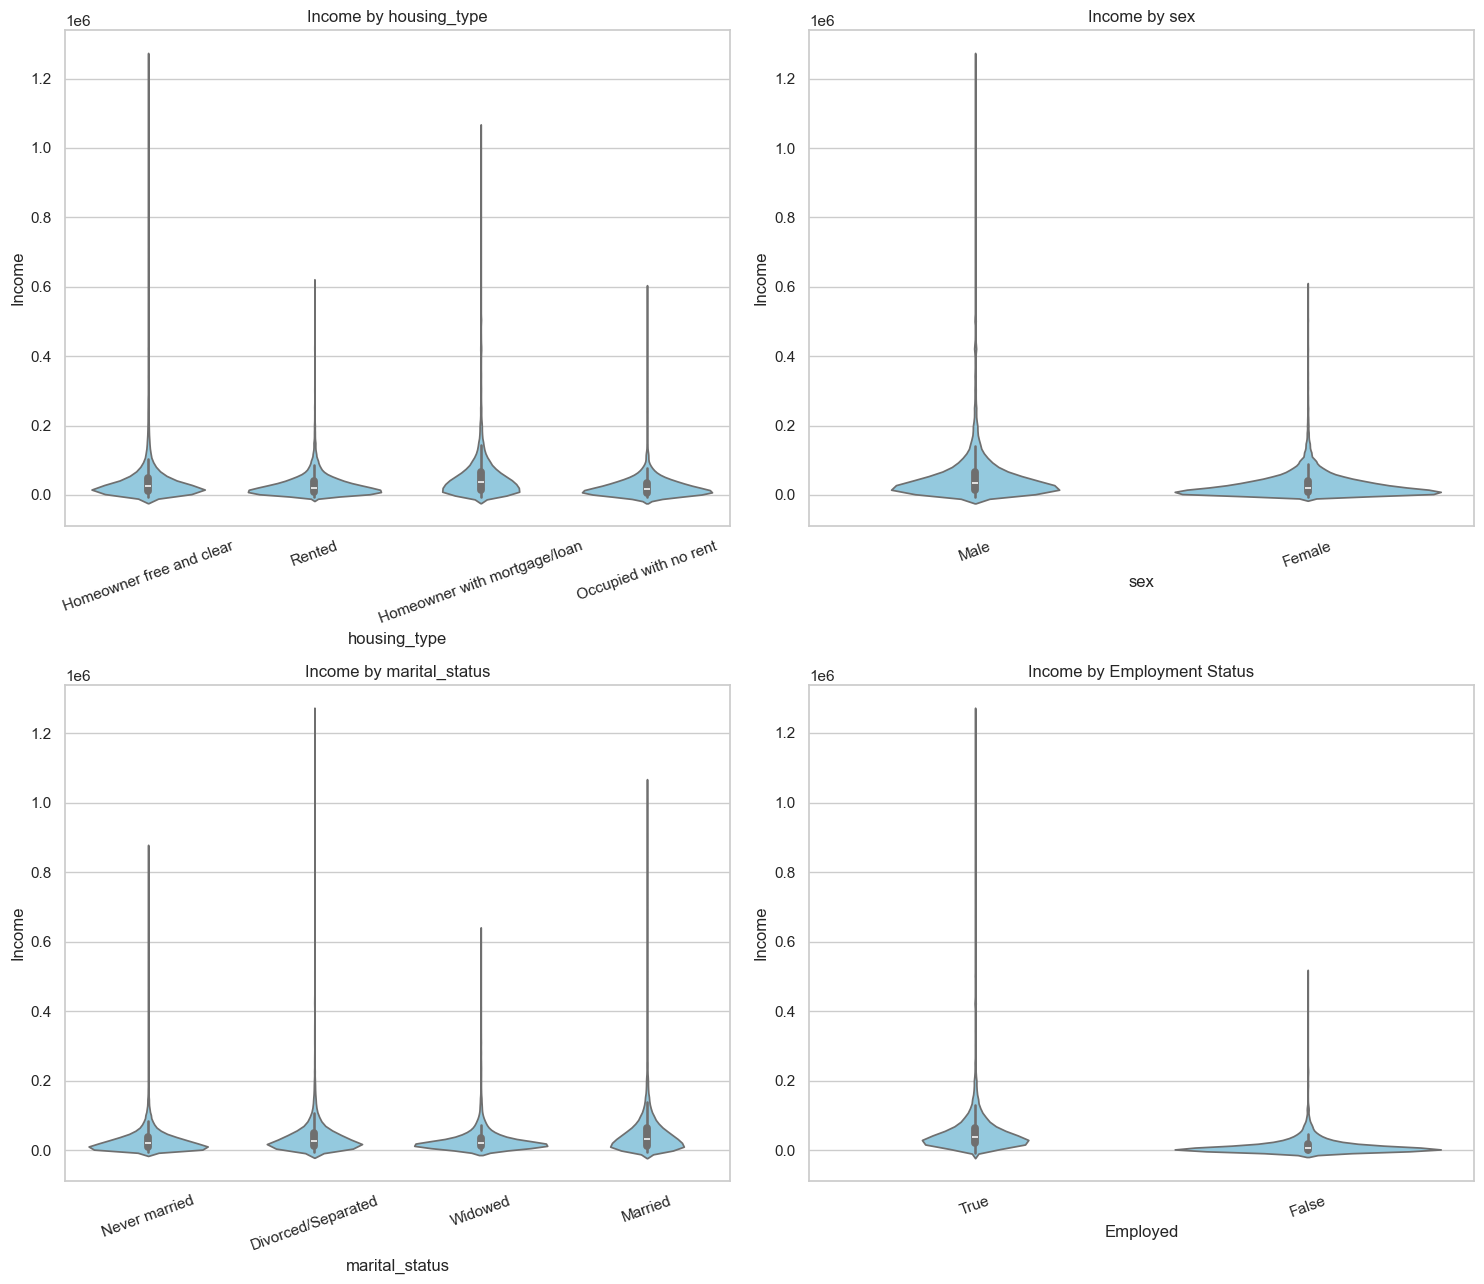

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13))
axes = axes.flatten()

# List of specific columns for violin plots
columns = ['housing_type', 'sex', 'marital_status']

# Iterate over the selected columns and create violin plots
for i, col in enumerate(columns):
    sns.violinplot(data=df, x=col, y='income', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Income by {col}')
    axes[i].set_ylabel('Income')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=20)

# Employment Status vs. Income
clear_df = df['is_employed'].dropna()
sns.violinplot(x=clear_df.astype(str), y='income', data=df, ax=axes[len(columns)], color='skyblue')
axes[len(columns)].set_title('Income by Employment Status')
axes[len(columns)].set_xlabel('Employed')
axes[len(columns)].set_ylabel('Income')
axes[len(columns)].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

In [38]:
#Income grouped by employed status 
print('Income grouped by employed status: ')
df.groupby('is_employed')['income'].describe()

Income grouped by employed status: 


,count,mean,std,min,25%,50%,75%,max
is_employed,,,,,,,,
False,2313.0,15162.649805,30479.714479,-6000.0,0.0,6000.0,19000.0,506000.0
True,44630.0,55645.097692,65425.481034,-6900.0,21900.0,39600.0,65400.0,1257000.0


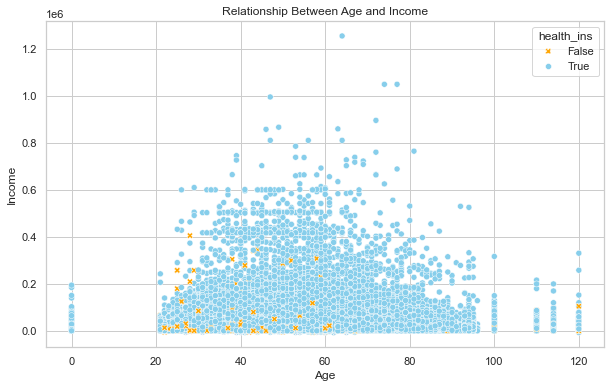

In [85]:
#Age and Income relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='age', 
    y='income', 
    style='health_ins', 
    hue='health_ins', 
    markers={True: 'o', False: 'X'}, 
    palette={True: 'skyblue', False: 'orange'}
)
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

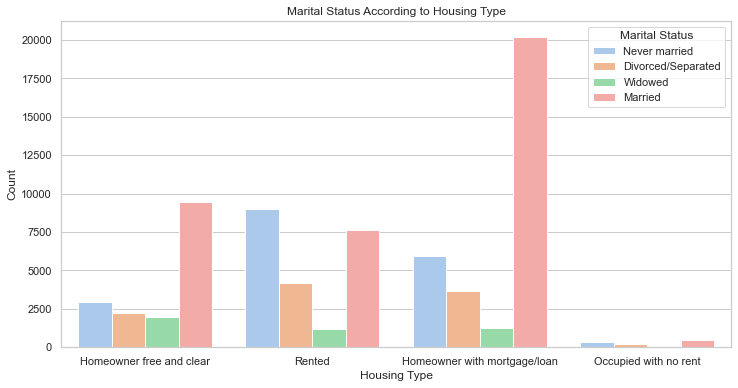

In [33]:
# Bar chart for marital status by housing type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='housing_type', hue='marital_status', palette='pastel')
plt.title('Marital Status According to Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()

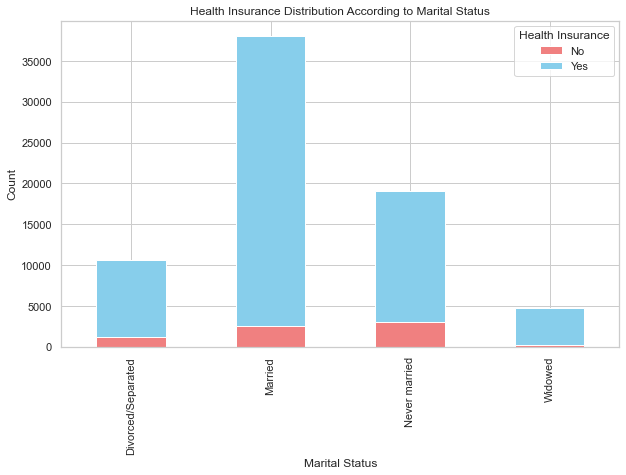

In [34]:
# Stacked bar plot health insurance by marital status
health_counts = df.groupby(['marital_status', 'health_ins']).size().unstack()
health_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], figsize=(10, 6))
plt.title('Health Insurance Distribution According to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Health Insurance', labels=['No', 'Yes'])
plt.show()

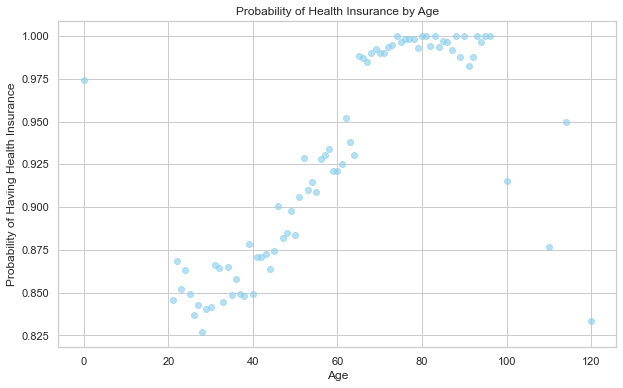

In [36]:
# The probability of health insurance by age (binary scatter plots)
prob_by_age = df.groupby('age')['health_ins'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.scatter(prob_by_age['age'], prob_by_age['health_ins'], color='skyblue', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Probability of Having Health Insurance')
plt.title('Probability of Health Insurance by Age')
plt.grid(True)
plt.show()

### 2. Data processing

In [57]:
#1. Missing values handling
# housing type, replace na for 'Unknown' class
df['housing_type'].fillna('Unknown', inplace=True)
# gas usage, fill na values using median
df['gas_usage'].fillna(df['gas_usage'].median(), inplace=True)
# recent move, fill na values using mode
df['recent_move_b'].fillna(df['recent_move_b'].mode()[0], inplace=True)
# vehivles, fill na alues using mean
df['num_vehicles'].fillna(df['num_vehicles'].mean(), inplace=True)
# is_employed, replace na for 'NotWorkForce' class
df['is_employed'].fillna('NotWorkForce', inplace=True)

/var/folders/51/fbzmg20s5p71l90t_lz973080000gn/T/ipykernel_23199/2245778411.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['housing_type'].fillna('Unknown', inplace=True)
/var/folders/51/fbzmg20s5p71l90t_lz973080000gn/T/ipykernel_23199/2245778411.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [59]:
# Missing values check
df.isna().sum()

custid            0
sex               0
is_employed       0
income            0
marital_status    0
health_ins        0
housing_type      0
num_vehicles      0
age               0
state_of_res      0
code_column       0
gas_usage         0
rooms             0
recent_move_b     0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          72458 non-null  object 
 1   sex             72458 non-null  object 
 2   is_employed     72458 non-null  object 
 3   income          72458 non-null  float64
 4   marital_status  72458 non-null  object 
 5   health_ins      72458 non-null  bool   
 6   housing_type    72458 non-null  object 
 7   num_vehicles    72458 non-null  float64
 8   age             72458 non-null  int64  
 9   state_of_res    72458 non-null  object 
 10  code_column     72458 non-null  int64  
 11  gas_usage       72458 non-null  float64
 12  rooms           72458 non-null  int64  
 13  recent_move_b   72458 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 7.3+ MB


In [63]:
#2.Changing data types
df.num_vehicles = df.num_vehicles.astype(int) # num of vehicles into int
df.health_ins = df.health_ins.astype(int) # bool healts_ins from True/False to 1/0
df.sex = df.sex.map({'Male': 0, 'Female': 1}) # bool sex from Female/Male to 1/0
df.recent_move_b = df.recent_move_b.map({'F':0, 'T':1}) # bool recent_move_b from T/F to 1/0

In [65]:
#One hot coding for some features
df = pd.get_dummies(df, columns=['is_employed'], prefix='employment_s', drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['marital_status'], prefix='marital_s', dtype=int)
df = pd.get_dummies(df, columns=['housing_type'], prefix='housing_type', dtype=int)
df = pd.get_dummies(df, columns=['state_of_res'], prefix='state', dtype=int)

In [67]:
# Dropping irrelevant features
df.drop(['custid', 'code_column', 'gas_usage'], axis=1, inplace=True)

In [69]:
# Dropping age outliers, age range 18-100
age_min = 18
age_max = 100
df = df[(df.age >= age_min) & (df.age <= age_max)]

In [71]:
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.income = scaler.fit_transform(df[['income']])
df.num_vehicles = scaler.fit_transform(df[['num_vehicles']])
df.age = scaler.fit_transform(df[['age']])
df.rooms = scaler.fit_transform(df[['rooms']])

In [73]:
# Shuffling
shuffled_data = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [75]:
# Split the data into training and validation set
from sklearn.model_selection import train_test_split

X = shuffled_data.drop('health_ins', axis=1)
y = shuffled_data['health_ins']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

train_data = pd.concat([X_train, y_train], axis=1) # training dataset with labels

# Separate majority and minority classes in the training dataset
df_majority = train_data[train_data.health_ins == 1]
df_minority = train_data[train_data.health_ins == 0]

In [77]:
# Random undersampling
from sklearn.utils import resample


df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=123)

df_balanced_1 = pd.concat([df_majority_downsampled, df_minority], axis=0)

<Axes: xlabel='health_ins', ylabel='count'>

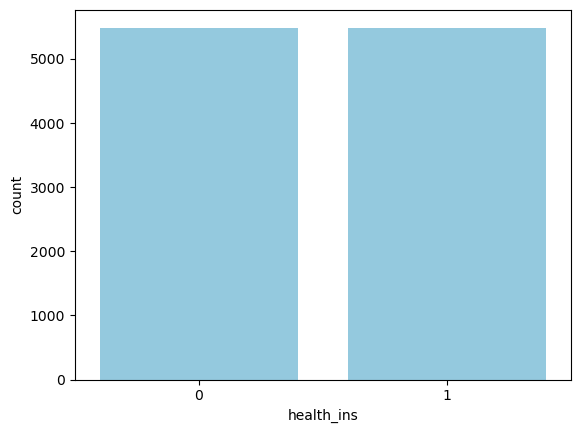

In [79]:
sns.countplot(data=df_balanced_1, x='health_ins', color='skyblue')

<Axes: xlabel='health_ins', ylabel='count'>

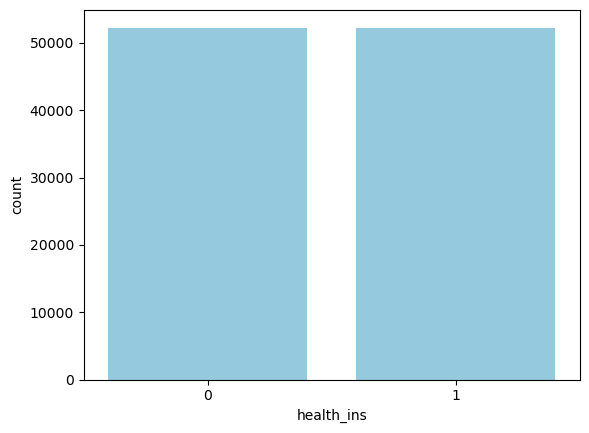

In [81]:
# Random oversampling
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)

df_balanced_2 = pd.concat([df_majority, df_minority_upsampled], axis=0)
sns.countplot(data=df_balanced_2, x='health_ins', color='skyblue')

<Axes: xlabel='health_ins', ylabel='count'>

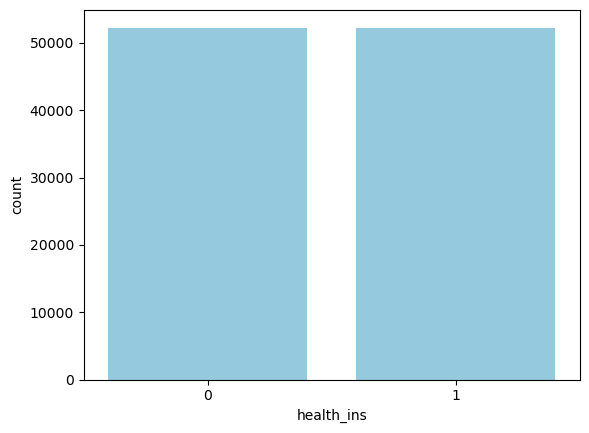

In [82]:
# Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

df_balanced_3 = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['health_ins'])], axis=1)
sns.countplot(data=df_balanced_3, x='health_ins', color='skyblue')

In [84]:
# Shuffle balanced datasets
shuffled_data1 = df_balanced_1.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_data2 = df_balanced_2.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_data3 = df_balanced_3.sample(frac=1, random_state=42).reset_index(drop=True)

In [86]:
# Undersampling dataset
X_1 = shuffled_data1.drop('health_ins', axis=1)
y_1 = shuffled_data1['health_ins']
# Oversampling dataset
X_2 = shuffled_data2.drop('health_ins', axis=1)
y_2 = shuffled_data2['health_ins']
# SMOTE dataset
X_3 = shuffled_data3.drop('health_ins', axis=1)
y_3 = shuffled_data3['health_ins']

### 3. Model build

In [179]:
# SVM Model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Implementing SVM model
svm_model = SVC()

# Setting params for SVM Algorithm
svm_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'], # Different kernels check
    'C': [0.1, 1, 10],                   # Regularization parameter check
    'gamma': ['scale', 'auto', 0.1],     # Kernel coefficient check
    'degree': [2, 3, 4]                  # Degree of the polynomial kernel function check
}

# Grid Search configuration with Cross Validation (5)
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit a Grid Search to training datasets

# imbalanced dataset
X, _, y, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)  # Sampling, using just 10% of the training data to accelerate GridSearch
svm_grid_search.fit(X, y)
print("Best params:", svm_grid_search.best_params_)
print("Best f1-score:", svm_grid_search.best_score_)

Best params: {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Best f1-score: 0.9527352041845172


In [170]:
# undersampled dataset
X, _, y, _ = train_test_split(X_1, y_1, train_size=0.6, random_state=42)
svm_grid_search.fit(X, y)
print("Best params:", svm_grid_search.best_params_)
print("Best f1-score:", svm_grid_search.best_score_)

Best params: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best f1-score: 0.7155899499274803


In [124]:
# oversampled dataset
X, _, y, _ = train_test_split(X_2, y_2, train_size=0.1, random_state=42)
svm_grid_search.fit(X, y)
print("Best params:", svm_grid_search.best_params_)
print("Best f1-score:", svm_grid_search.best_score_)

Best params: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best f1-score: 0.7217718610936003


In [140]:
# SMOTE dataset
X, _, y, _ = train_test_split(X_3, y_3, train_size=0.06, random_state=42)
svm_grid_search.fit(X, y)
print("Best params:", svm_grid_search.best_params_)
print("Best f1-score:", svm_grid_search.best_score_)

Best params: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best f1-score: 0.7657759544567734


In [146]:
# Using the best parameter to train models for each example
# imbalanced
svm_model_im = SVC(kernel='poly', C=10, gamma=0.1, degree=3)
svm_model_im.fit(X_train, y_train)

SVC(C=10, gamma=0.1, kernel='poly')

In [156]:
# undersampled dataset
svm_model_us = SVC(kernel='linear', C=10, gamma='scale', degree=2)
svm_model_us.fit(X_1, y_1)

SVC(C=10, degree=2, kernel='linear')

In [158]:
# oversampled dataset
svm_model_os = SVC(kernel='rbf', C=10, gamma='scale', degree=2)
svm_model_os.fit(X_2, y_2)

SVC(C=10, degree=2)

In [ ]:
# SMOTE dataset
svm_model_sm = SVC(kernel='linear', C=10, gamma='scale', degree=2)
svm_model_sm.fit(X_2, y_2)

In [160]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve )

# Function to estimate model evaluation metrics
def eval_metrics(y_pred, y_real, example_name):
    # Count metrics
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average='weighted')
    recall = recall_score(y_real, y_pred, average='weighted')
    f1 = f1_score(y_real, y_pred, average='weighted')
    # Print metrics
    print(f'Example: {example_name}')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    # Confusion matrix
    cm = confusion_matrix(y_real, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

Example: oversampled
Accuracy: 0.7338966615874775
Precision: 0.8811145439463637
Recall: 0.7338966615874775
F1 Score: 0.7850111305008473


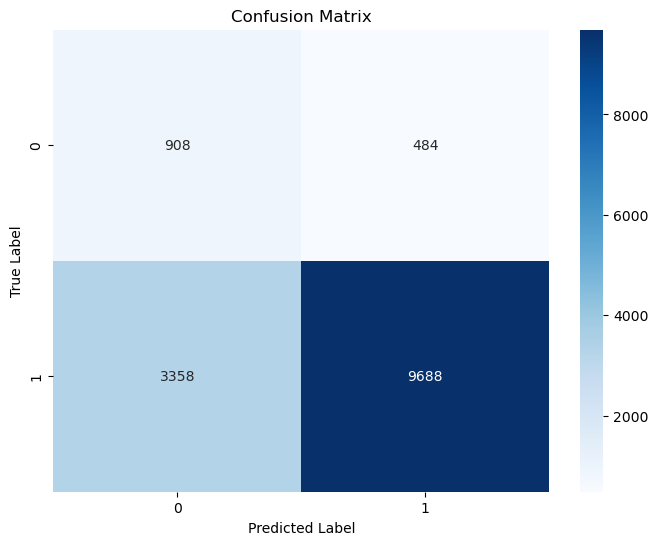

In [166]:
y_pred_v_os = svm_model_os.predict(X_val)
eval_metrics(y_pred_v_os, y_val, 'oversampled')

Example: imbalanced
Accuracy: 0.9055963429837928
Precision: 0.8907790239572859
Recall: 0.9055963429837928
F1 Score: 0.8645273778414323


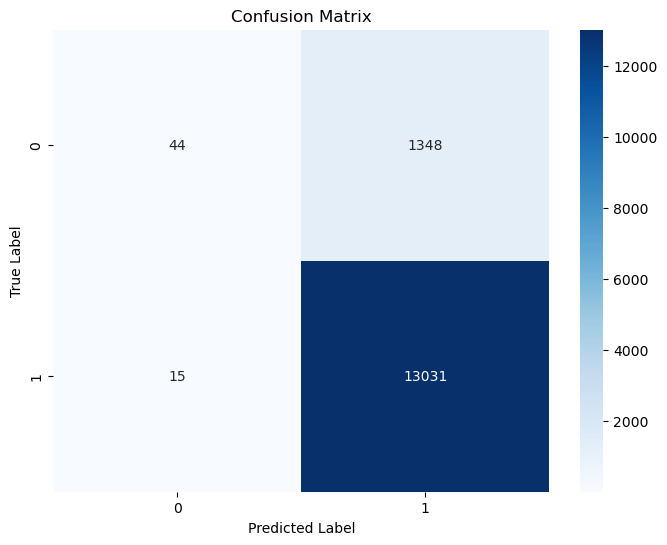

In [197]:
# Checking results on validation data
# imbalanced
y_pred_v_im = svm_model_im.predict(X_val)
eval_metrics(y_pred_v_im, y_val, 'imbalanced')
# undersampled
#y_pred_v_us = svm_model_us.predict(X_val)
#eval_metrics(y_pred_v_us, y_val, 'undersampled')
# oversampled
#y_pred_v_os = svm_model_os.predict(X_val)
#eval_metrics(y_pred_v_os, y_val, 'oversampled')
# SMOTE
#y_pred_v_sm = svm_model_sm.predict(X_val)
#eval_metrics(y_pred_v_sm, y_val, 'SMOTE')